In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings

from PIL.GifImagePlugin import getdata

In [2]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [3]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [4]:
nm = 1e-9
um = 1e-6

In [5]:
modeApi = lumapi.MODE()

In [1]:
modeApi.switchtolayout()
modeApi.deleteall()
modeApi.cleardcard

NameError: name 'modeApi' is not defined

In [7]:
wavelength = 1550*nm
nf = 1.44      # Índice de refração do núcleo
ns = 1.33      # Índice de refração do substrato

Dados do dispositivo:

In [8]:
x, xspan, y, yspan, z, zspan = 0, 5*um, 0, 8.93811*um, 0, 1*um
x_air, xspan_air, y_air, yspan_air, z_air, zspan_air = 0, 5*um, 6.46905*um, 4*um, 0, 1*um
x_s, xspan_s, y_s, yspan_s, z_s, zspan_s =  0, 5*um, -9.21905*um, 9.5*um, 0, 1*um

In [9]:
film_material = 'SiO2 (Glass) - Palik'
air_material = 'etch'
#substrate_material = 

Criação dos dispositivos:       

In [10]:
#film
modeApi.addrect()
modeApi.set('name', 'film')
modeApi.set('material', film_material)
modeApi.set('x',x)
modeApi.set('x span', xspan)
modeApi.set('y', y)
modeApi.set('y span', yspan)
modeApi.set('z', z)
modeApi.set('z span', zspan)
#air
modeApi.addrect()
modeApi.set('name', 'air')
modeApi.set('material', air_material)
modeApi.set('x',x_air)
modeApi.set('x span', xspan_air)
modeApi.set('y', y_air)
modeApi.set('y span', yspan_air)
modeApi.set('z', z_air)
modeApi.set('z span', zspan_air)
#substrate
modeApi.addrect()
modeApi.set('name', 'substrate')
modeApi.set('index', 1.33)
modeApi.set('x',x_s)
modeApi.set('x span', xspan_s)
modeApi.set('y', y_s)
modeApi.set('y span', yspan_s)
modeApi.set('z', z_air)
modeApi.set('z span', zspan_s)

In [11]:
neff_mode1 = []
neff_mode2 = []
neff_mode3 = []
neff_mode4 = []
neff_mode5 = []
neff_mode6 = []
neff_mode7 = []
neff_mode8 = []
neff_mode9 = []
neff_mode10 = []
neff_mode11 = []
neff_mode12 = []
V_values = []

Adição do solver (FDE)

In [12]:
modeApi.addfde()
modeApi.set('x', 0)
modeApi.set('y', (y_s + y + y_air)/3)
modeApi.set('z', 0)
modeApi.set('y span', (yspan + yspan_s + yspan_air)*1.5)
modeApi.set('index', 1)
modeApi.set('solver type', '1D Y:Z prop')
modeApi.set('mesh cells y', 100)
modeApi.set('y min bc', 'Metal')
modeApi.set('y max bc', 'Metal')

In [13]:
core_thickness_vector = np.linspace(0, 2*4.469054e-06, 20)

In [ ]:
for core_thickness in core_thickness_vector: 
    modeApi.switchtolayout()
    modeApi.setnamed('film', 'y span', core_thickness)
    modeApi.setnamed('air', 'y', (core_thickness/2 + 2e-6))
    modeApi.setnamed('substrate', 'y', -(core_thickness/2 + 4.75e-6))
    modeApi.run()
    modeApi.findmodes()
    neff_mode1.append(modeApi.real(modeApi.getdata('mode1','neff')))
    neff_mode2.append(modeApi.real(modeApi.getdata('mode2','neff')))
    neff_mode3.append(modeApi.real(modeApi.getdata('mode3','neff')))
    neff_mode4.append(modeApi.real(modeApi.getdata('mode4', 'neff')))
    neff_mode5.append(modeApi.real(modeApi.getdata('mode5','neff')))
    neff_mode6.append(modeApi.real(modeApi.getdata('mode6','neff')))
    neff_mode7.append(modeApi.real(modeApi.getdata('mode7','neff')))
    neff_mode8.append(modeApi.real(modeApi.getdata('mode8','neff')))
    neff_mode9.append(modeApi.real(modeApi.getdata('mode9','neff')))
    neff_mode10.append(modeApi.real(modeApi.getdata('mode10','neff')))
    neff_mode11.append(modeApi.real(modeApi.getdata('mode11','neff')))
    neff_mode12.append(modeApi.real(modeApi.getdata('mode12','neff')))
    V_values.append(np.pi / wavelength * core_thickness * np.sqrt(nf**2 - ns**2))

In [324]:
from scipy import interpolate

In [347]:
neff_interpol = interpolate.interp1d(V_values, neff_mode9)
neff_interpolSmooth = interpolate.UnivariateSpline(V_values, neff_mode9)
neff_interpolSmooth.set_smoothing_factor(500)

In [1]:
plt.plot(V_values, neff_interpol(V_values), color='blue')
plt.plot(V_values, neff_interpolSmooth(V_values), color='red')
plt.show()

NameError: name 'plt' is not defined

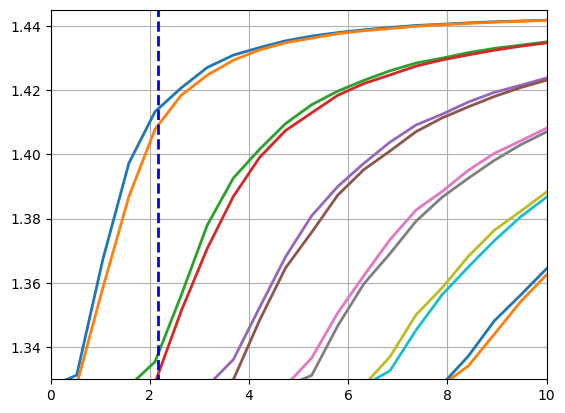

In [306]:
plt.plot(V_values, neff_mode1,linewidth=2)
plt.plot(V_values, neff_mode2,linewidth=2)
plt.plot(V_values, neff_mode3,linewidth=2)
plt.plot(V_values, neff_mode4,linewidth=2)
plt.plot(V_values, neff_mode5,linewidth=2)
plt.plot(V_values, neff_mode6,linewidth=2)
plt.plot(V_values, neff_mode7,linewidth=2)
plt.plot(V_values, neff_mode8,linewidth=2)
plt.plot(V_values, neff_mode9,linewidth=2)
plt.plot(V_values, neff_mode10,linewidth=2)
plt.plot(V_values, neff_mode11,linewidth=2)
plt.plot(V_values, neff_mode12,linewidth=2)
plt.grid()
plt.plot(2.169*np.ones(len(V_values)), V_values, color='blue', linestyle='--', linewidth=2)
plt.ylim(1.33, 1.445)
plt.xlim(0,10)
plt.show()

In [279]:
modeApi.frequencysweep()

In [295]:
disperion = modeApi.getdata('frequencysweep', 'D')
loss = modeApi.getdata('frequencysweep', 'loss')

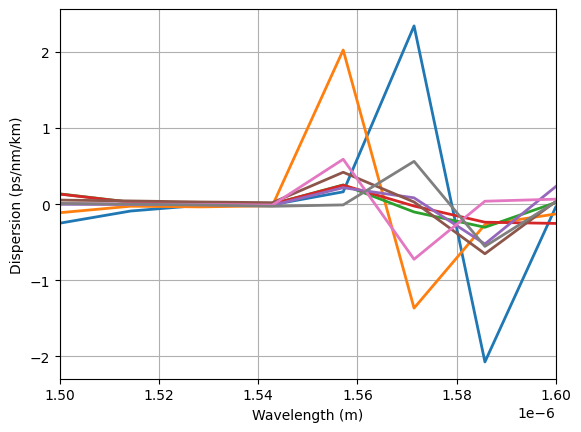

In [284]:
wavelength_vector = np.linspace(1500e-9, 1600e-9, len(disperion))
plt.plot(wavelength_vector, disperion, linewidth=2)
plt.grid(True)
plt.xlim(1500e-9, 1600e-9)
plt.ylabel('Dispersion (ps/nm/km)')
plt.xlabel('Wavelength (m)')
plt.show()

In [282]:
data = modeApi.getresult('frequencysweep')
print(data)

neff sweep
loss sweep
beta sweep
vg sweep
D sweep
neff
loss
vg
D
beta
f
f_vg
f_D
mode_number


Text(0.5, 0, 'Wavelength (m)')

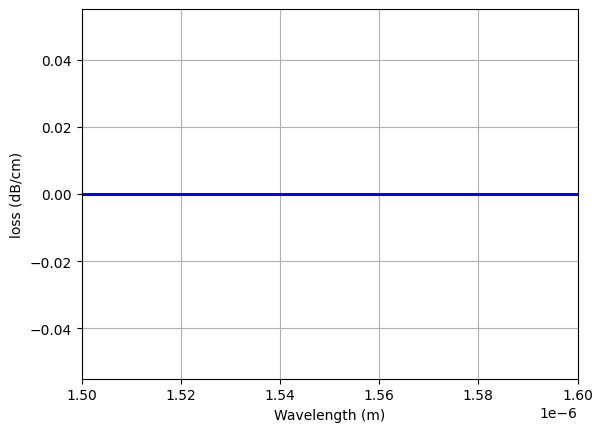

In [296]:
wavelength_vector1 = np.linspace(1500e-9, 1600e-9, len(loss))
plt.plot(wavelength_vector1, loss, linewidth=2, color='blue')
plt.grid(True)
plt.xlim(1500e-9, 1600e-9)
#plt.ylim(-0.02, 0.02)
plt.ylabel('loss (dB/cm)')
plt.xlabel('Wavelength (m)')